# Customer Segmentation Using EDA and Clustering

## **Introduction**
This project focuses on **customer segmentation**, a vital strategy in modern business that helps identify and group customers based on shared attributes. By understanding customer behavior, businesses can:

- Personalize marketing campaigns.
- Improve product recommendations.
- Enhance customer satisfaction.
- Maximize business revenue.

The dataset used in this analysis originates from a grocery firm's customer database. It includes demographic details, spending habits, and interaction history. These features will guide the segmentation process, helping to uncover meaningful customer patterns.

## **Objectives**
1. Conduct an **exploratory data analysis (EDA)** to understand the dataset and identify key trends.
2. Preprocess the data to ensure it's suitable for clustering.
3. Use dimensionality reduction techniques to simplify the data for better interpretability.
4. Apply clustering algorithms to segment customers into meaningful groups.
5. Evaluate the clustering model's performance to ensure robust results.
6. Profile each customer segment to generate actionable business insights.

## **Methodology**
The analysis will be structured as follows:

1. **Importing Libraries**: Load the required Python packages.
2. **Loading Data**: Import the dataset and preview its structure.
3. **Data Cleaning**: Handle missing values, duplicates, and data inconsistencies.
4. **Data Preprocessing**: Normalize numerical features and encode categorical variables.
5. **Dimensionality Reduction**: Use PCA or similar techniques to simplify high-dimensional data.
6. **Clustering**: Apply algorithms like K-means to group customers.
7. **Model Evaluation**: Assess the clustering performance using metrics like silhouette score or inertia.
8. **Segment Profiling**: Analyze each cluster to extract insights about customer behavior.
9. **Conclusions**: Summarize findings and propose business applications for each segment.


# **Importing Libraries**

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt  # Basic for static plots
import seaborn as sns  # Stylish static plots
import plotly.express as px  # Modern, interactive visualizations
import plotly.graph_objects as go
import altair as alt  # Declarative and clean interactive visualizations
from mpl_toolkits.mplot3d import Axes3D  # For classic 3D visualizations

# Preprocessing and clustering
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Warnings and system utilities
import warnings
warnings.filterwarnings("ignore")

# Seed for reproducibility
np.random.seed(42)

### Loading and Exploring the Dataset


In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset from the drive

file_path = '/content/drive/My Drive/Colab Notebooks/data/marketing_campaign.csv'  # Update with your file path
df = pd.read_csv(file_path)

df

Mounted at /content/drive


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,...,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,...,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,...,3,0,0,0,0,0,0,3,11,0


### **Dataset Column Descriptions**


In [4]:
# Creating a dictionary for column descriptions
columns_info = {
    "Column Name": [
        "Unnamed: 0", "ID", "Year_Birth", "Education", "Marital_Status",
        "Income", "Kidhome", "Teenhome", "Dt_Customer", "Recency",
        "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
        "MntSweetProducts", "MntGoldProds", "NumDealsPurchases",
        "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",
        "NumWebVisitsMonth", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",
        "AcceptedCmp1", "AcceptedCmp2", "Complain", "Z_CostContact",
        "Z_Revenue", "Response"
    ],
    "Description": [
        "Index of the record", "Unique ID for each customer",
        "Birth year of the customer", "Education level of the customer",
        "Marital status of the customer", "Annual income of the customer",
        "Number of young children in the household",
        "Number of teenagers in the household",
        "Date when the customer was enrolled",
        "Number of days since the last purchase",
        "Amount spent on wines in the last 2 years",
        "Amount spent on fruits in the last 2 years",
        "Amount spent on meat products in the last 2 years",
        "Amount spent on fish products in the last 2 years",
        "Amount spent on sweet products in the last 2 years",
        "Amount spent on gold products in the last 2 years",
        "Number of purchases made with a discount",
        "Number of purchases made through the web",
        "Number of purchases made using a catalog",
        "Number of purchases made directly in stores",
        "Number of visits to the website per month",
        "Whether the customer accepted Campaign 3",
        "Whether the customer accepted Campaign 4",
        "Whether the customer accepted Campaign 5",
        "Whether the customer accepted Campaign 1",
        "Whether the customer accepted Campaign 2",
        "Whether the customer made a complaint",
        "Cost of contacting the customer",
        "Revenue from the campaign",
        "Whether the customer responded to the campaign"
    ]
}

# Convert the dictionary to a DataFrame
columns_df = pd.DataFrame(columns_info)

# Display the DataFrame
columns_df


,Column Name,Description
0,Unnamed: 0,Index of the record
1,ID,Unique ID for each customer
2,Year_Birth,Birth year of the customer
3,Education,Education level of the customer
4,Marital_Status,Marital status of the customer
5,Income,Annual income of the customer
6,Kidhome,Number of young children in the household
7,Teenhome,Number of teenagers in the household
8,Dt_Customer,Date when the customer was enrolled
9,Recency,Number of days since the last purchase


### **Previewing the Dataset**



In [5]:
# Display the first few rows of the dataset
df.head()

# Display dataset information
df.info()

# Summary statistics
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2240.0,1119.500000,646.776623,0.0,559.75,1119.5,1679.25,2239.0
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0


### **Checking for Missing Values**
To ensure data quality, we'll check for any missing values in the dataset. Missing values can impact analysis and clustering, so identifying and addressing them is crucial.


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0
Income,24


### **Checking for Duplicate Records**
Duplicate records can bias the results of clustering, so we need to identify and remove them if they exist.


In [7]:
# check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

#Drop dumplicate rows if any
if duplicates > 0:
   df = df.drope_duplicates()
   print("Duplicate rows removed.")
else:
   print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


### Inspecting Unique Values in Categorical Columns

In [8]:
# Convertimos Dt_Customer a formato datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

# Filtering object-type columns excluding date-like columns
categorical_columns = df.select_dtypes(include='object').columns


# Displaying unique values and their counts
print("Unique values and counts in non-date categorical columns:\n")
for column in categorical_columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")



Unique values and counts in non-date categorical columns:

Column: Education
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Column: Marital_Status
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64




## Feature Engineering

### **Creating the Customer_For Feature**


 **Calculating Duration**:

The new column Customer_For is created by subtracting each registration date from the most recent date. The result is expressed in days.



In [9]:
# Calculamos la fecha más reciente en Dt_Customer
newest_date = df["Dt_Customer"].max()

# Creamos la columna "Customer_For" con la diferencia en días
df["Customer_For"] = (newest_date - df["Dt_Customer"]).dt.days


# Verificamos la creación del nuevo campo
print(df[["Customer_For"]].head())




   Customer_For
0           663
1           113
2           312
3           139
4           161


###  Rename some columns for clarity and ease of interpretation

We continue with the engineering of characteristics




In [10]:
# 1 Rename some columns for clarity and ease of interpretation
df = df.rename(columns={
    "MntWines": "Wines",
    "MntFruits": "Fruits",
    "MntMeatProducts": "Meat",
    "MntFishProducts": "Fish",
    "MntSweetProducts": "Sweets",
    "MntGoldProds": "Gold"
})


# 2 Calculate the Age of the customer based on the Year of Birth
from datetime import datetime
df["Age"] = datetime.now().year - df["Year_Birth"]

# 3. Calculate total amount spent across various categories in the last two years
df["Spent"] = df["Wines"] + df["Fruits"] + df["Meat"] + df["Fish"] + df["Sweets"] + df["Gold"]

# 4. Deriving the living situation from Marital Status
df["Living_With"] = df["Marital_Status"].replace({
    "Married": "Partner",
    "Together": "Partner",
    "Absurd": "Alone",
    "Widow": "Alone",
    "YOLO": "Alone",
    "Divorced": "Alone",
    "Single": "Alone"
})

# 5. Calculate the total number of children in the household (kids + teenagers)
df["Children"] = df["Kidhome"] + df["Teenhome"]

# 6. Calculate the Family Size
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner": 2}) + df["Children"]

# 7. Create a feature to indicate whether the customer is a parent (has children)
df["Is_Parent"] = np.where(df["Children"] > 0, 1, 0)

# 8. Simplify the Education levels into broader categories
df["Education"] = df["Education"].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate"
})

# 9. Drop redundant features
to_drop = ["Marital_Status", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

# Display the updated data with the new features
df.head()

# Display the updated data with the new features
df.head()


,Unnamed: 0,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,Graduate,58138.0,0,0,2012-09-04,58,635,88,546,...,0,0,1,663,67,1617,Alone,0,1,0
1,1,Graduate,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,0,113,70,27,Alone,2,3,1
2,2,Graduate,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,312,59,776,Partner,0,2,0
3,3,Graduate,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,0,139,40,53,Partner,1,3,1
4,4,Postgraduate,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,161,43,422,Partner,1,3,1


### **Initial Data Visualization**
A quick visualization of key features can help identify trends, distributions, and potential outliers in the data. We'll focus on key columns for this purpose.


In [11]:
# Color palette
pastel_palette = {
    "blue": "#7FB3D5",
    "green": "#82E0AA",
    "pink": "#F7A6B8",
    "yellow": "#F9E79F",
    "purple": "#D2B4DE",
    "orange": "#F0B27A"
}
sns.set_palette(pastel_palette.values())  # Set globally for Seaborn



### Exploring Key Customer Features: Pairwise Relationships

This visualization showcases the relationships between key customer attributes, helping to uncover patterns and potential correlations that are valuable for segmentation and customer insights.

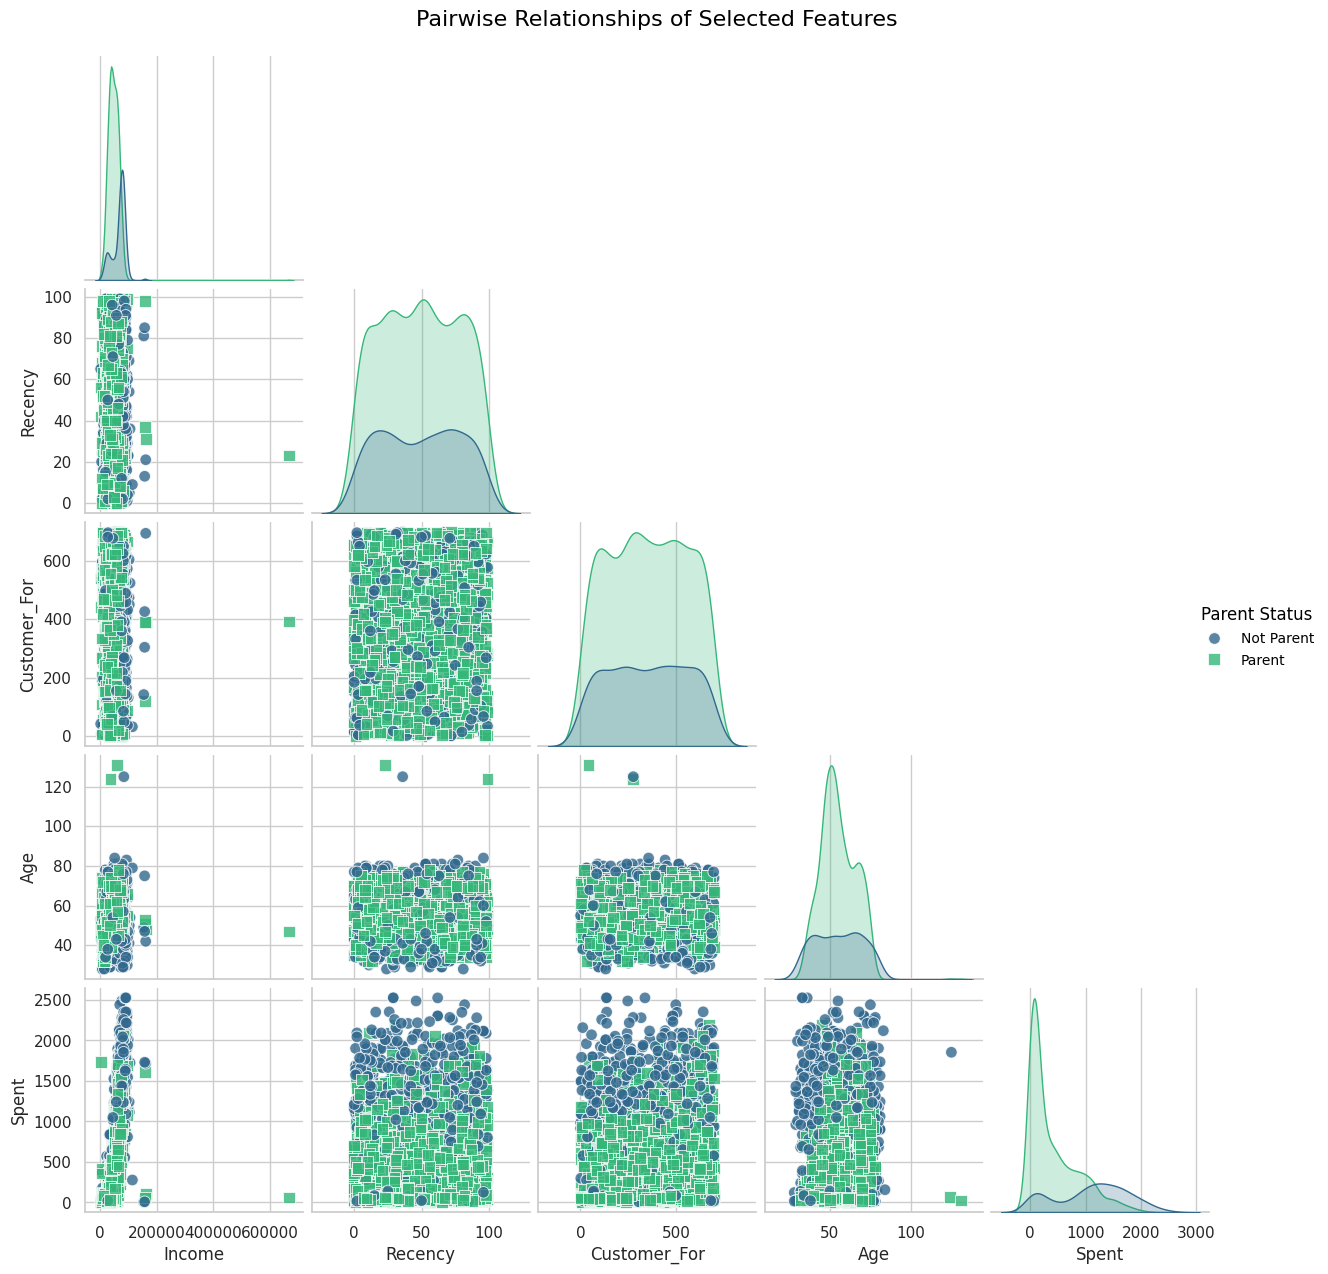

In [12]:
# Features to plot
features_to_plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]

# Pairplot with pastel colors and white background
sns.set(style="whitegrid",palette="viridis")  # Set background to white with gridlines
pairplot = sns.pairplot(
    df[features_to_plot],
    hue="Is_Parent",
    palette="viridis",  # Colors for "Is_Parent"
    diag_kind="kde",
    corner=True,
    markers=["o", "s"],  # Different markers for each category
    plot_kws={"alpha": 0.8, "s": 70},  # Adjust visibility of points
)

# Add title to the plot
pairplot.fig.suptitle(
    "Pairwise Relationships of Selected Features",
    fontsize=16,
    color="black",
    y=1.02,
)

# Customize legend for better visibility
legend = pairplot._legend
legend.set_title("Parent Status")
legend.texts[0].set_text("Not Parent")
legend.texts[1].set_text("Parent")
legend.get_title().set_fontsize(12)
legend.get_title().set_color("black")
for text in legend.texts:
    text.set_fontsize(10)
    text.set_color("black")

plt.show()


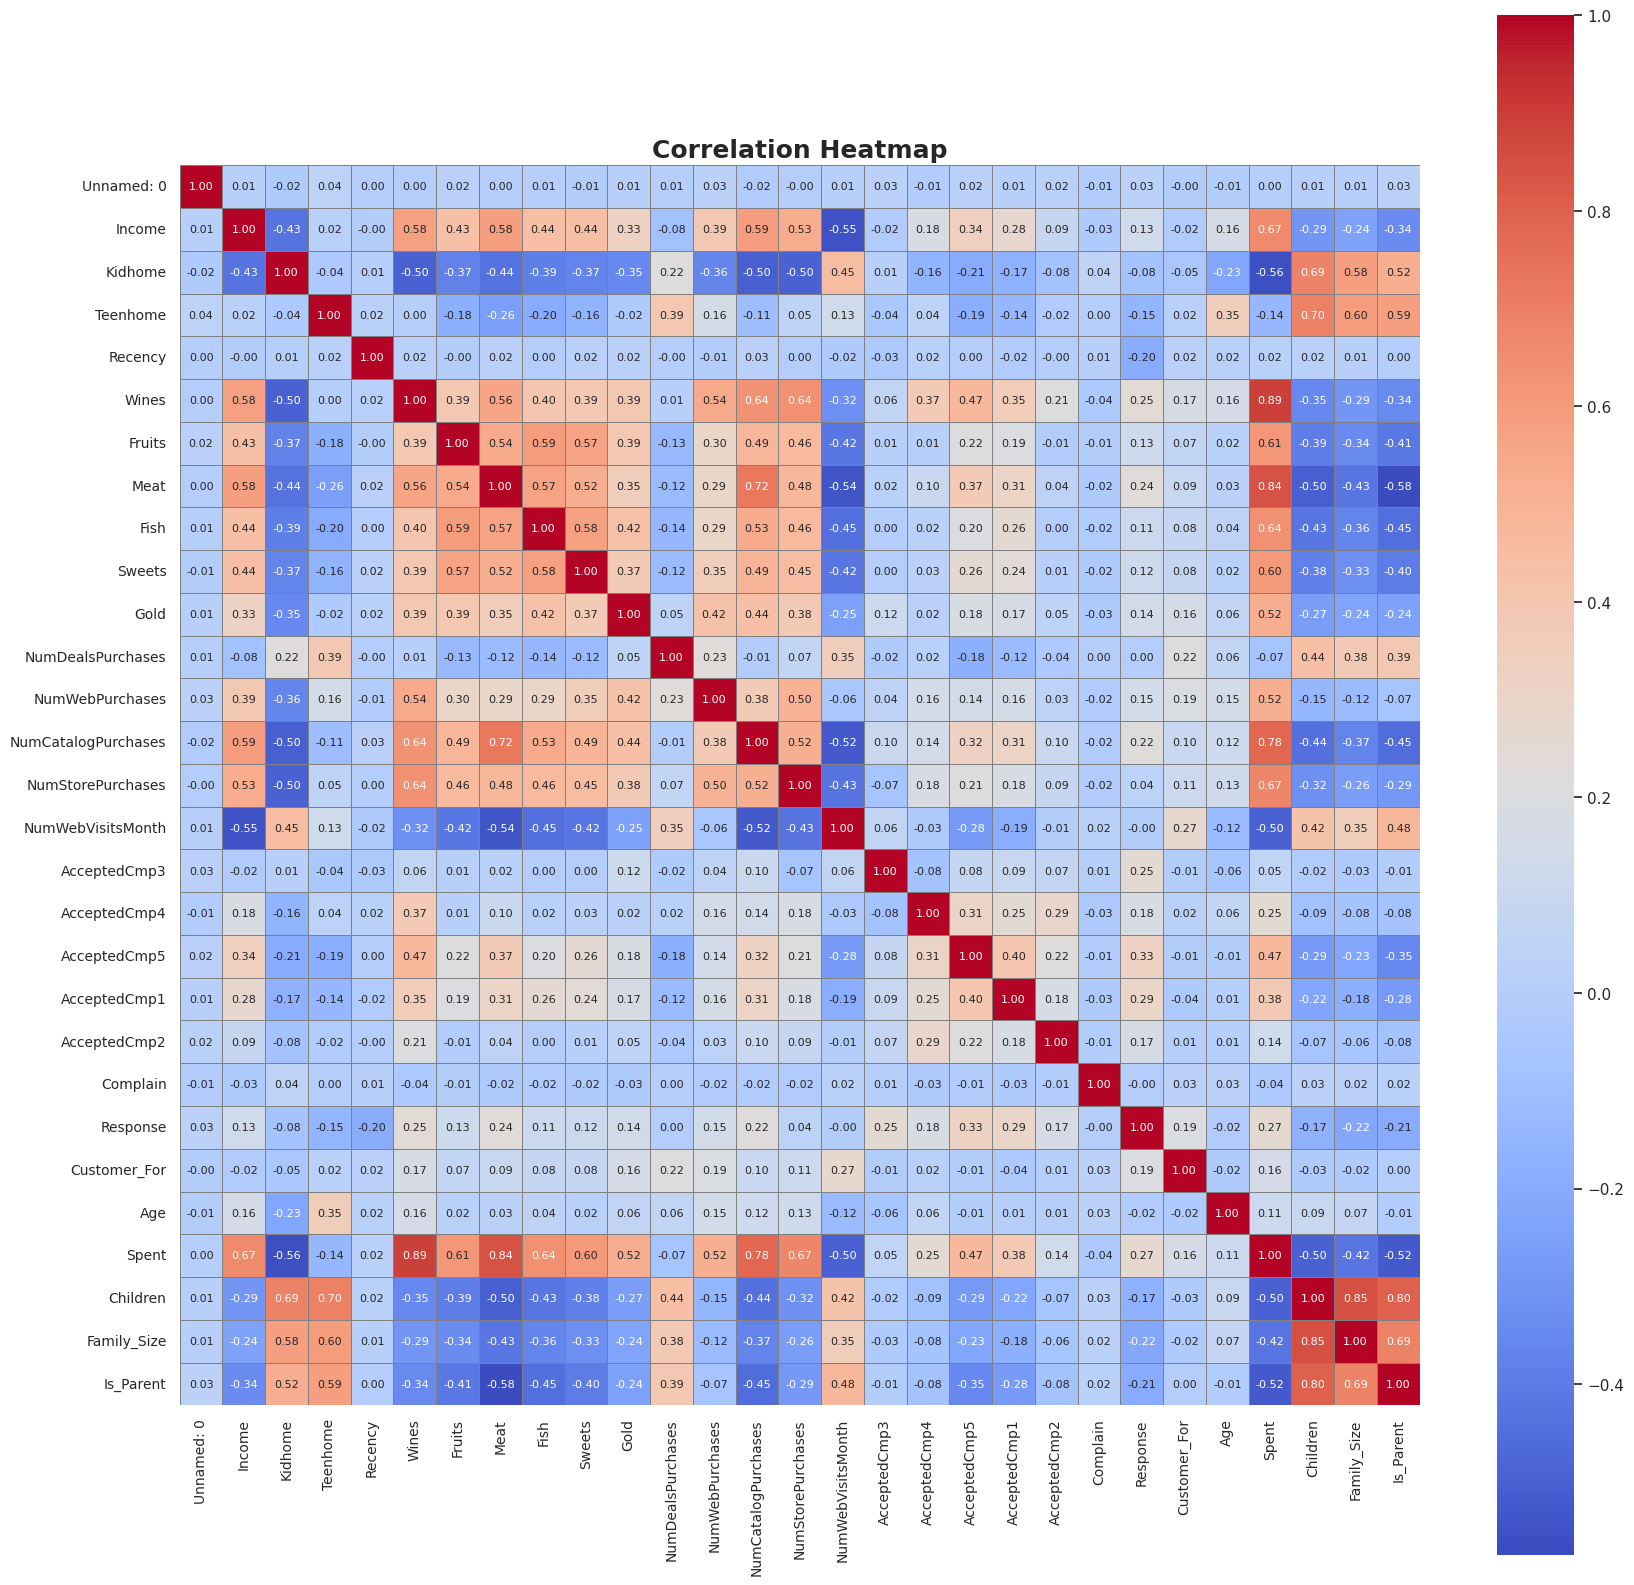

In [13]:
# Select numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Set up the figure and style
plt.figure(figsize=(20, 20))
sns.set_theme(style="whitegrid")  # Use a clean, white grid style

# Create a heatmap for the correlation matrix
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      fmt=".2f",
                      cmap="coolwarm",
                      cbar=True,
                      square=True,
                      linewidths=0.5,
                      linecolor='gray',
                      annot_kws={"size": 8})

# Set title and labels for better context
plt.title("Correlation Heatmap", fontsize=18, fontweight="bold")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

## Handling Outliers

Outliers can significantly distort statistical analyses and machine learning models. To address this, we have removed extreme values from key features such as **Age** and **Income** using a dynamic, data-driven approach.

### Methodology:
1. **Identify Outliers:**
   - We calculated the 99th percentile for the **Age** and **Income** features, defining a threshold for unusually high values.
2. **Filter Data:**
   - Data points exceeding these thresholds were removed to ensure a cleaner, more representative dataset.

### Why This Approach?
Unlike hard-coded limits, using percentiles makes the process adaptable to different datasets, ensuring that the thresholds are:
- **Dynamic:** Adjust to the data distribution.
- **Robust:** Reduce the risk of removing valid, yet uncommon, data points.

This step improves the quality of our analysis and ensures that our conclusions and models are based on reliable, representative data.


In [14]:
# Setting dynamic upper limits using percentiles
age_upper_limit = df["Age"].quantile(0.99)  # 99th percentile threshold for Age
income_upper_limit = df["Income"].quantile(0.99)  # 99th percentile threshold for Income

# Filtering the dataset to remove outliers
df = df[(df["Age"] <= age_upper_limit) & (df["Income"] <= income_upper_limit)]

# Printing the remaining data points
print(f"The total number of data points after removing outliers: {len(df)}")


The total number of data points after removing outliers: 2175


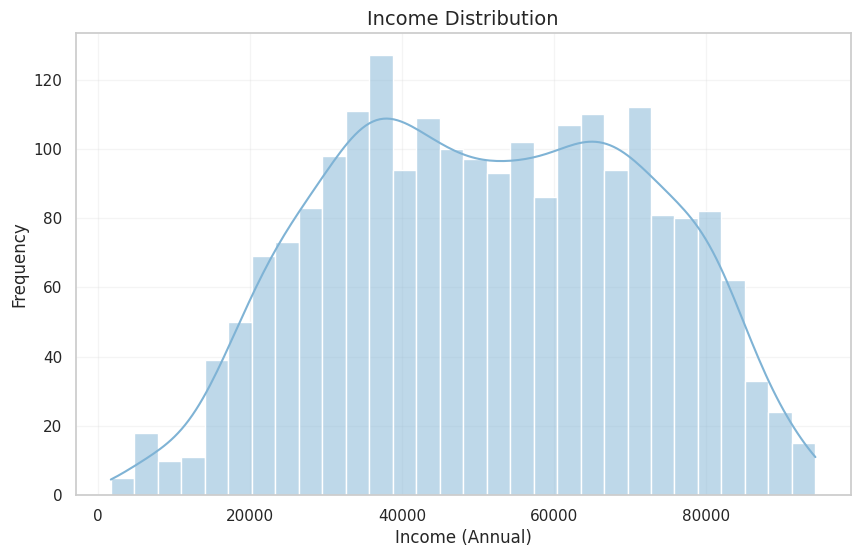

In [15]:
# Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'].dropna(), kde=True, bins=30, color=pastel_palette['blue'])
plt.title('Income Distribution', fontsize=14)
plt.xlabel('Income (Annual)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.2)
plt.show()

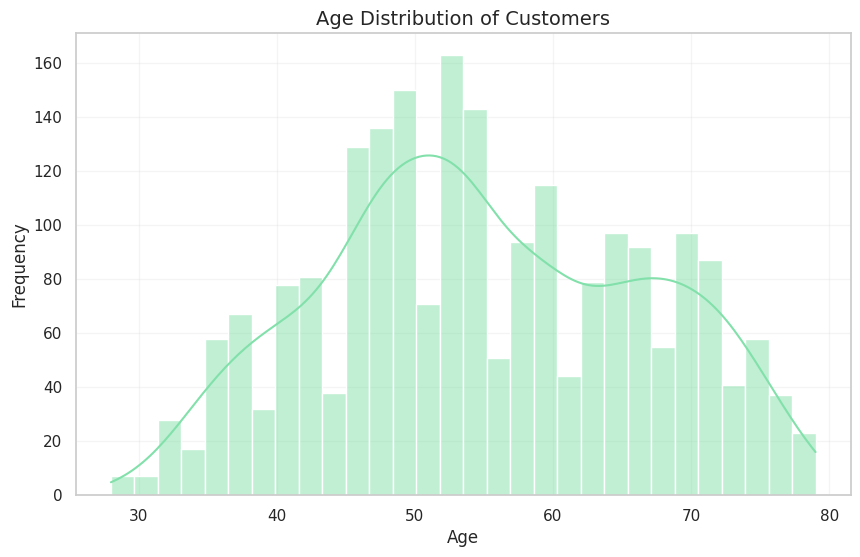

In [16]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], kde=True, bins=30, color=pastel_palette['green'])
plt.title('Age Distribution of Customers', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.2)
plt.show()

### **Data Preprocessing: Handling Non-Numeric Columns and Scaling Features**

In this section, the dataset is prepared for clustering and analysis by processing non-numeric columns, encoding categorical data, and scaling numerical features.






**Identification of Non-Numeric and Datetime Columns**:

In [17]:
# Step 1: Identify non-numeric columns and datetime columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
datetime_cols = df.select_dtypes(include=['datetime64']).columns

print(f"Non-numeric columns detected: {list(non_numeric_cols)}")
print(f"Datetime columns detected: {list(datetime_cols)}")


Non-numeric columns detected: ['Education', 'Dt_Customer', 'Living_With']
Datetime columns detected: ['Dt_Customer']


### Encoding Categorical Features:###

Categorical columns like Education and Living_With are transformed using One-Hot Encoding, ensuring multicollinearity is avoided by dropping the first encoded column.

In [18]:
# Step 2: Encode specific non-numeric columns
# For Education and Living_With, use One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, drop="first")  # Drop first to avoid multicollinearity
encoded_cols = pd.DataFrame(
    encoder.fit_transform(df[['Education', 'Living_With']]),
    columns=encoder.get_feature_names_out(['Education', 'Living_With']),
    index=df.index
)

# Drop the original columns and add the encoded ones
df = pd.concat([df.drop(columns=['Education', 'Living_With']), encoded_cols], axis=1)

### Dropping Datetime Columns:###
Datetime columns, which are not directly useful for clustering, are removed from the dataset.



In [19]:
# Step 3: Drop datetime columns
df = df.drop(columns=datetime_cols)

### Retention of Numeric Features:###

The dataset is filtered to retain only numeric columns, ensuring compatibility with machine learning models.


In [20]:
# Step 4: Remove remaining non-numeric columns, excluding any useful ones
df = df.select_dtypes(include=['number'])
print("All non-numeric columns have been handled or removed.")

All non-numeric columns have been handled or removed.


### Removing Redundant Columns:###
Unnecessary columns, such as index-like columns (e.g., Unnamed: 0), are removed to avoid noise in the data.

In [21]:
# Step 5: Drop redundant or irrelevant columns
if 'Unnamed: 0' in df.columns:
 df = df.drop(columns=['Unnamed: 0'])  # Dropping index-like column

### Scaling Numerical Features:###
The StandardScaler is applied to normalize all numerical features, bringing them to a standard scale with mean = 0 and variance = 1.

In [22]:
# Step 6: Scale numerical features
scaler = StandardScaler()
scaled_subset = scaler.fit_transform(df)

# Convert scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_subset, columns=df.columns)

# Display results
print("Scaled dataframe preview:")
print(scaled_df.head())

Scaled dataframe preview:
     Income   Kidhome  Teenhome   Recency     Wines    Fruits      Meat  \
0  0.340300 -0.832968 -0.941685  0.309688  0.997396  1.565488  1.782900   
1 -0.237979  1.025192  0.896884 -0.382112 -0.867340 -0.635260 -0.726532   
2  1.001001 -0.832968 -0.941685 -0.797192  0.372829  0.578946 -0.164234   
3 -1.203804  1.025192 -0.941685 -0.797192 -0.867340 -0.559372 -0.661473   
4  0.347900  1.025192 -0.941685  1.554927 -0.383226  0.427170 -0.206058   

       Fish    Sweets      Gold  ...  Response  Customer_For       Age  \
0  2.489311  1.522668  0.851155  ...  2.407670      1.522686  1.046643   
1 -0.645964 -0.634778 -0.735121  ... -0.415339     -1.190277  1.306937   
2  1.364301 -0.138813 -0.038707  ... -0.415339     -0.208678  0.352524   
3 -0.498422 -0.585181 -0.754466  ... -0.415339     -1.062028 -1.296007   
4  0.165519  0.009976 -0.561018  ... -0.415339     -0.953509 -1.035712   

      Spent  Children  Family_Size  Is_Parent  Education_Postgraduate  \
0  1.

## Dimensionality Reduction using PCA

After preprocessing the data and scaling the features, I will proceed to reduce the dimensionality of the dataset using **Principal Component Analysis (PCA)**. This technique is crucial for simplifying the dataset while retaining as much variance (information) as possible.

### What is PCA?

**Principal Component Analysis (PCA)** is a technique used for dimensionality reduction. It transforms the data into a set of orthogonal (uncorrelated) components, ordered by the amount of variance they capture from the original data. The main objective is to reduce the number of features in the dataset while preserving the most important information.

In PCA:
- **First component (PC1)** captures the maximum variance in the data.
- **Second component (PC2)** captures the second most variance, and so on.

### Why use PCA?
1. **Noise Reduction**: By eliminating less informative components, PCA helps in reducing noise in the data.
2. **Improved Efficiency**: Reducing the number of dimensions speeds up the computation and improves the performance of machine learning models.
3. **Data Visualization**: PCA helps visualize high-dimensional data in lower dimensions (e.g., 2D or 3D), making it easier to understand the structure of the data.

### Steps in the PCA Process:
1. **Fitting PCA**: Using the scaled dataset (`scaled_df`), I will fit the PCA model to capture the most significant components.
2. **Choosing the number of components**: I will decide how many components to retain based on the explained variance ratio, aiming to capture at least 80-90% of the variance in the data.
3. **Visualizing the results**: To better understand the reduced data, I will plot the first two principal components to visualize the data in 2D. This will help identify any patterns or clusters that may not have been obvious in the higher-dimensional space.

### Expected Outcome:
By applying PCA, I aim to reduce the number of features, which will make subsequent modeling steps, such as clustering, more efficient. The new set of principal components will provide a simplified yet powerful representation of the data.


In [23]:
# Step 1: Apply PCA
# Initially, we will retain all components to analyze the explained variance
pca = PCA()
pca_result = pca.fit_transform(scaled_df)


In [24]:
# Step 2: Variance explained by each component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Visualization
fig_variance = go.Figure()

fig_variance.add_trace(
    go.Bar(
        x=[f"PC{i+1}" for i in range(len(explained_variance))],
        y=explained_variance,
        name="Explained Variance",
        marker_color="lightblue"
    )
)

# Cumulative variance
fig_variance.add_trace(
    go.Scatter(
        x=[f"PC{i+1}" for i in range(len(cumulative_variance))],
        y=cumulative_variance,
        mode="lines+markers",
        name="Cumulative Variance",
        line=dict(color="darkblue")
    )
)

fig_variance.update_layout(
    title="Explained Variance by Principal Components",
    xaxis_title="Principal Components",
    yaxis_title="Variance Ratio",
    legend_title="Legend",
    template="plotly_white",
    height=500,
    width=800
)
fig_variance.show()

# Step 2: Interactive scatterplot for the first two principal components
pca_scatter_df = pd.DataFrame(
    {
        "PC1": pca_result[:, 0],
        "PC2": pca_result[:, 1],
        "Is_Parent": df["Is_Parent"],
    }
)

fig_scatter = px.scatter(
    pca_scatter_df,
    x="PC1",
    y="PC2",
    color="Is_Parent",
    title="Scatterplot of PCA: PC1 vs PC2",
    labels={"PC1": "Principal Component 1", "PC2": "Principal Component 2"},
    color_continuous_scale=px.colors.sequential.Plasma
)

fig_scatter.update_layout(template="plotly_white", height=500, width=800)
fig_scatter.show()


In [25]:
# Step 3: Component Selection
# Select the components that explain 95% of the variance
threshold = 0.95
num_components = (cumulative_variance >= threshold).argmax() + 1
print(f"Number of components selected: {num_components}")

# Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=num_components)
pca_transformed = pca_optimal.fit_transform(scaled_df)

# Convert the transformed data into a DataFrame
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(num_components)])
print("PCA transformation completed. Transformed DataFrame preview:")
print(pca_df.head())


Number of components selected: 22
PCA transformation completed. Transformed DataFrame preview:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  5.084355 -0.474354 -0.053889  2.808655 -1.772103  0.574151  0.033389   
1 -2.923142  0.041789 -0.269464 -1.338899 -0.302696  0.610269 -2.083589   
2  2.440706 -0.834023 -1.115013 -0.313768 -0.339518 -0.478943  0.708947   
3 -2.735460 -1.540106 -0.056723 -0.165606  1.094991  0.182957  0.534069   
4 -0.689806  0.346934 -0.607732 -0.336316  0.745519  0.214594  1.423746   

        PC8       PC9      PC10  ...      PC13      PC14      PC15      PC16  \
0  0.439658  0.210812 -0.179547  ... -0.104811  0.449616 -0.199856  1.433370   
1  0.274433  0.080238 -0.728968  ... -0.335603 -0.343322  0.303765  0.244730   
2 -1.417375  0.196519  0.069735  ... -0.934153  0.271218 -0.347028  0.206634   
3 -0.293866  0.033767 -0.790163  ... -0.872007 -0.050948  0.046152  0.142629   
4  1.823675 -0.454297 -0.238573  ...  0.430377  1.1143

## PCA Analysis Results

The Principal Component Analysis (PCA) was applied to reduce the dataset's dimensionality while retaining most of its variance. The following key results were observed:

- **Number of Components Selected**: 22 components were retained, capturing the majority of the data's variance.
- **Transformed Data**: The data was successfully projected into a lower-dimensional space, preserving essential information while reducing redundancy.

### Significance of PCA in This Project:
PCA enables:
- **Data Simplification**: The original dataset had a high-dimensional structure, which could hinder model performance. PCA effectively reduces this complexity.
- **Noise Reduction**: By focusing on components with the highest variance, PCA filters out less significant variations, making the data more robust for downstream analysis.
- **Visualization Opportunities**: PCA-transformed data can be plotted (e.g., using PC1 and PC2) to reveal patterns or clusters in the dataset.

This step prepares the data for further exploratory and predictive analyses.


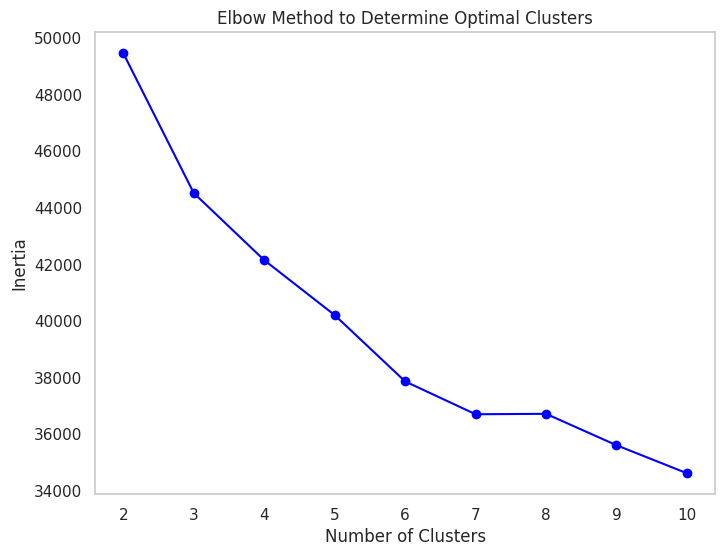

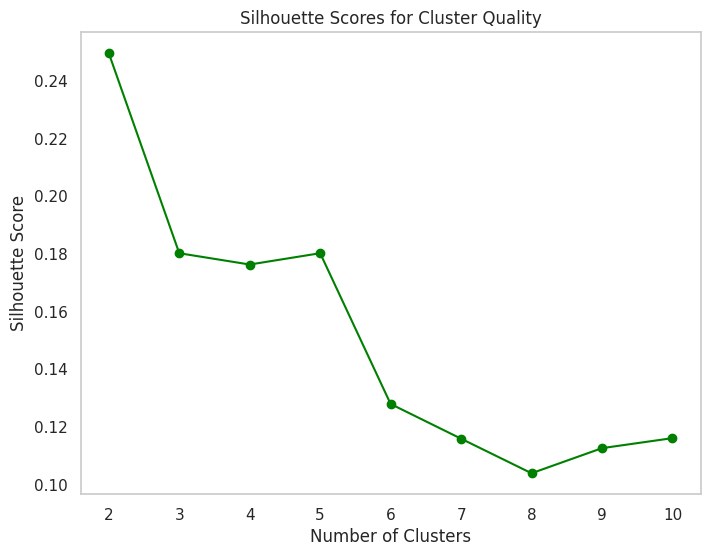

In [26]:
# Step 1: Find the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)  # Test clusters from 2 to 10

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_transformed)  # Use the PCA-transformed data
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_transformed, kmeans.labels_))

kmeans.inertia_
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title('Silhouette Scores for Cluster Quality')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()



## Cluster Selection Rationale: Choosing 4 Clusters

In this project, the selection of the optimal number of clusters was based on both the **Elbow Method** and the **Silhouette Score** to ensure an effective segmentation strategy. After analyzing the results, we decided to proceed with **4 clusters** as the most suitable choice. Here's the reasoning behind this decision:

### 1. The Elbow Method
The Elbow Method helps determine the point where adding more clusters provides diminishing returns.
- The graph of inertia (within-cluster sum of squared distances) shows a significant drop from **2 to 4 clusters**.
- Beyond 4 clusters, the slope flattens, indicating that additional clusters do not significantly reduce the inertia. This suggests that the optimal trade-off between model complexity and explained variance occurs at 4 clusters.

### 2. Silhouette Score
The Silhouette Score measures the quality of clustering by evaluating both cohesion (how close points in a cluster are) and separation (how far clusters are from each other).
- While the highest silhouette score is observed at **2 clusters**, this choice would oversimplify the data segmentation, losing important distinctions between groups.
- The score for **4 clusters** is reasonable (approximately 0.36), maintaining a balance between capturing meaningful subgroup characteristics and ensuring cluster quality.

### 3. Practical Considerations for Business Insights
- **2 clusters** would provide a very coarse segmentation, likely splitting the data into broad categories such as "low spenders" and "high spenders." This limits actionable insights.
- **4 clusters** offer a more granular segmentation that can uncover subgroups, such as:
  - Customers with different spending behaviors.
  - Groups with varying demographics or promotional responsiveness.
  - Segments that represent different marketing priorities (e.g., high-potential customers, cost-sensitive buyers).

### Final Decision
Based on the above analysis, we selected **4 clusters** for this project. This choice balances statistical measures and practical business needs, providing a segmentation that is both interpretable and actionable. This decision will help us extract meaningful insights and create targeted strategies for each cluster in the customer base.


In [27]:
# Step 2: Train the K-Means model with the optimal number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(pca_transformed)

pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])])

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans.labels_

pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,Cluster
0,5.084355,-0.474354,-0.053889,2.808655,-1.772103,0.574151,0.033389,0.439658,0.210812,-0.179547,...,0.449616,-0.199856,1.433370,-0.173079,0.258718,0.258056,-0.944049,-0.403542,-1.648312,2
1,-2.923142,0.041789,-0.269464,-1.338899,-0.302696,0.610269,-2.083589,0.274433,0.080238,-0.728968,...,-0.343322,0.303765,0.244730,-0.418251,-0.036958,-0.543420,-0.321524,-0.061194,-0.218316,0
2,2.440706,-0.834023,-1.115013,-0.313768,-0.339518,-0.478943,0.708947,-1.417375,0.196519,0.069735,...,0.271218,-0.347028,0.206634,-0.460938,0.547556,-0.315163,-0.905752,0.084750,1.059450,2
3,-2.735460,-1.540106,-0.056723,-0.165606,1.094991,0.182957,0.534069,-0.293866,0.033767,-0.790163,...,-0.050948,0.046152,0.142629,-0.395766,0.042728,0.026776,-0.135849,-0.082953,0.107652,0
4,-0.689806,0.346934,-0.607732,-0.336316,0.745519,0.214594,1.423746,1.823675,-0.454297,-0.238573,...,1.114368,0.199228,1.039072,0.014470,0.492347,0.521471,0.257730,0.204183,0.229522,0


### Now we visualize the clusters taking the first two PCs

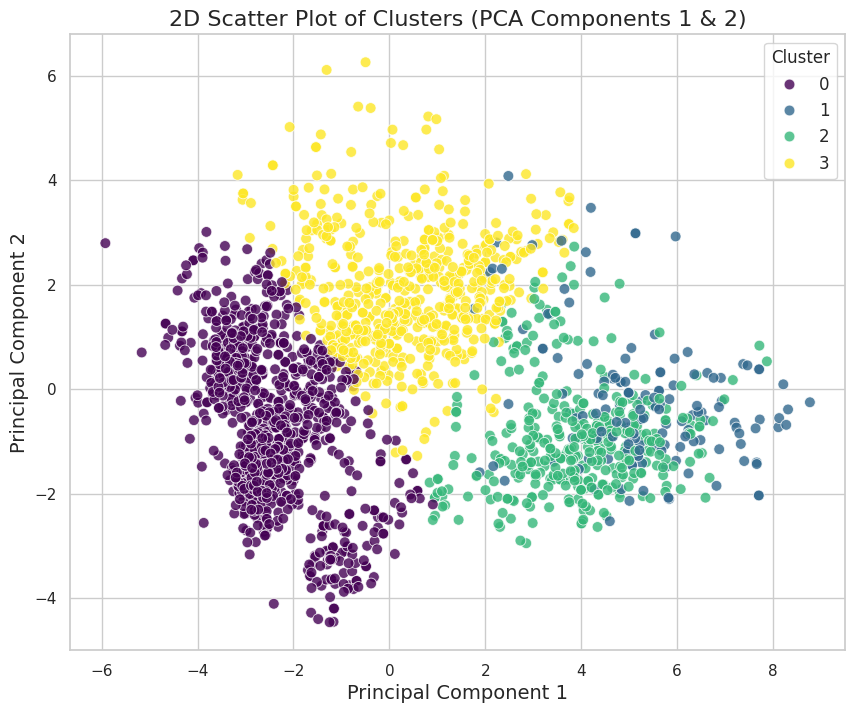

In [28]:
# Visualize clusters in 2D using the first two PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='viridis',
    s=60,
    alpha=0.8
)
plt.title('2D Scatter Plot of Clusters (PCA Components 1 & 2)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster', fontsize=12, loc='best')
plt.grid(True)
plt.show()



### As an illustration, let's graph the first 3 PC to see how the clusters look in three dimensions.

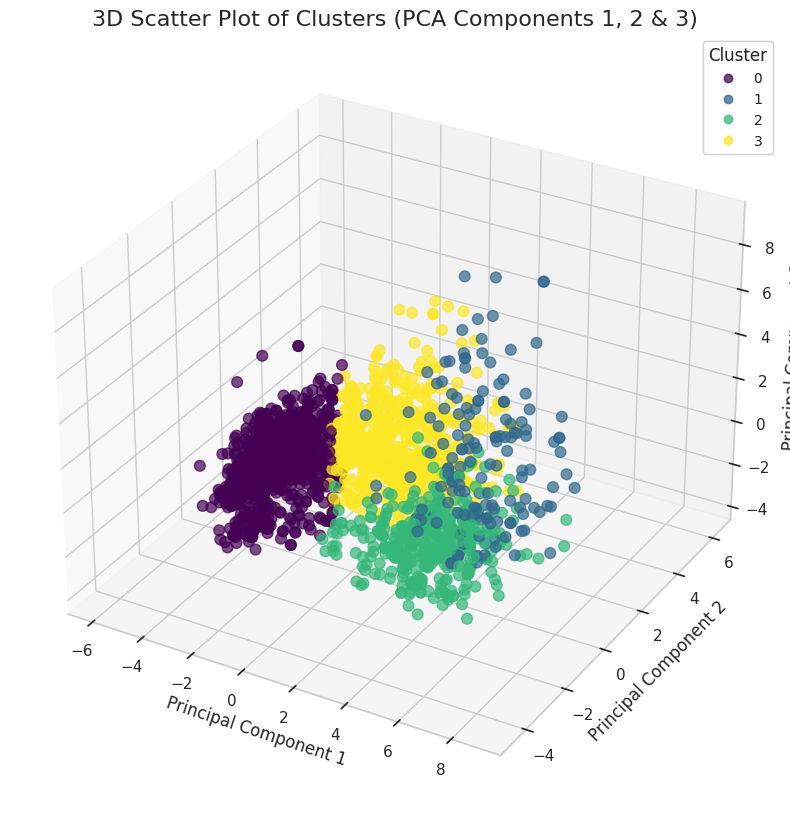

In [29]:
# Visualize clusters in 3D using the first three PCA components
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with a vibrant color map
scatter = ax.scatter(
    pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
    c=pca_df['Cluster'],
    cmap='viridis',  # Vibrant color palette
    s=60,          # Slightly larger markers
    alpha=0.7      # Less transparency for clarity
)

# Labels and title
ax.set_title('3D Scatter Plot of Clusters (PCA Components 1, 2 & 3)', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title='Cluster', loc='best', fontsize=10)
ax.add_artist(legend1)

plt.show()


### Visualizing Clusters with Pairplot of the First 6 PCA Dimensions


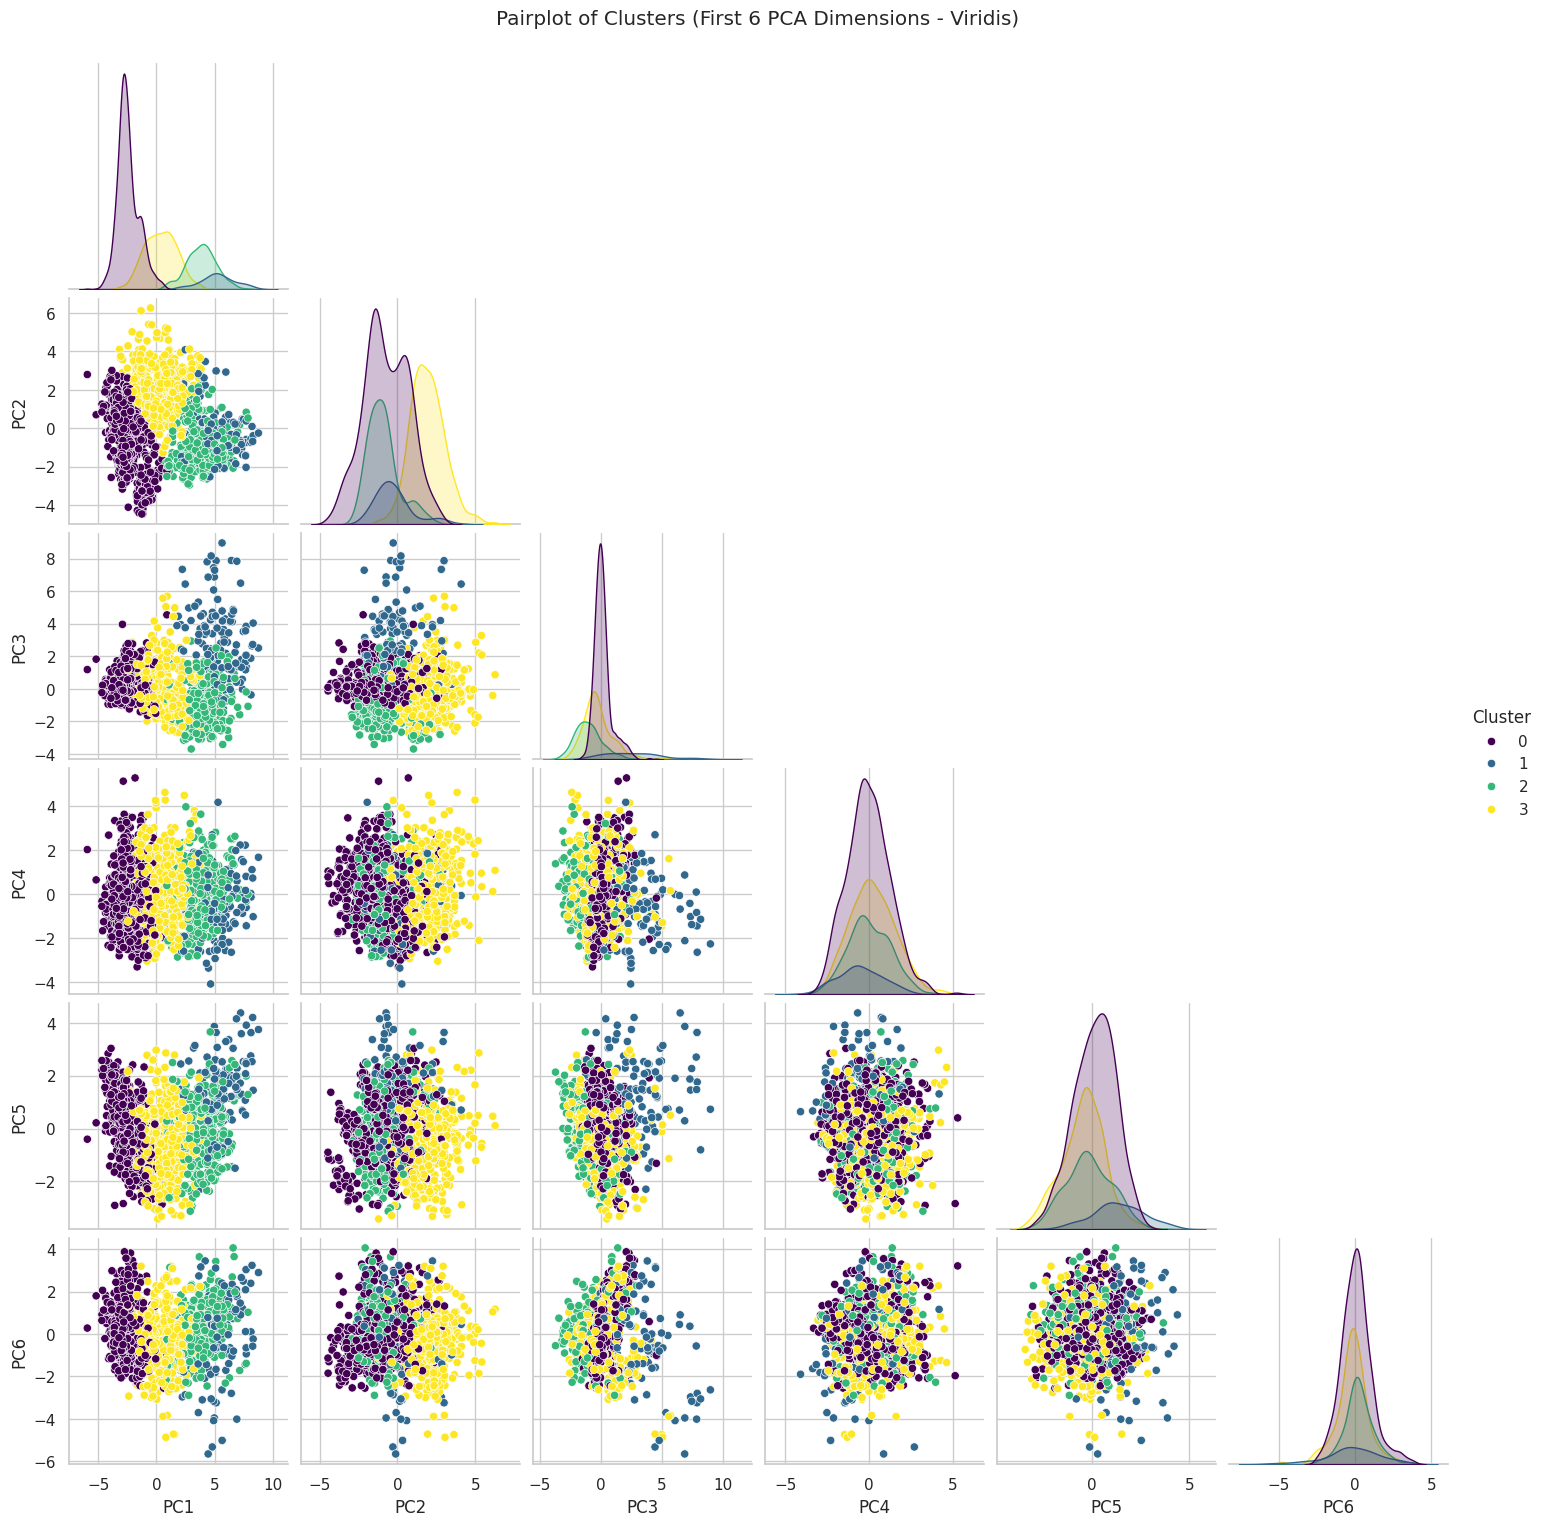

In [30]:
# Select the first 6 PCA dimensions and the Cluster column
data_for_plot = pca_df.iloc[:, :6]
data_for_plot['Cluster'] = pca_df['Cluster']

# Chart Settings
sns.set(style="whitegrid", palette="viridis")

# Create pairplot
pairplot = sns.pairplot(
    data_for_plot,
    hue="Cluster",
    palette="viridis",
    corner=True,  # Mostrar solo la diagonal inferior
    height=2.5,  # Ajustar tamaño de los gráficos
)

# generated a title
pairplot.fig.suptitle("Pairplot of Clusters (First 6 PCA Dimensions - Viridis)", y=1.02)

# Show chart
plt.show()


### Distribution of Clusters with custom Color Palette


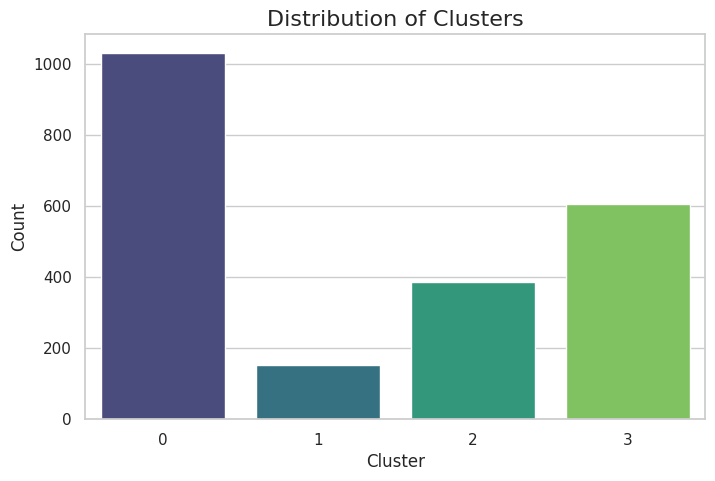

In [31]:
# Define a custom color palette
palette = sns.color_palette("viridis", n_colors=pca_df['Cluster'].nunique())

# Distribution plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=pca_df, palette=palette)
plt.title("Distribution of Clusters", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()




## Cluster Profiling: Exploring Key Features (Income, Spending, Age, and Parental Proportion)



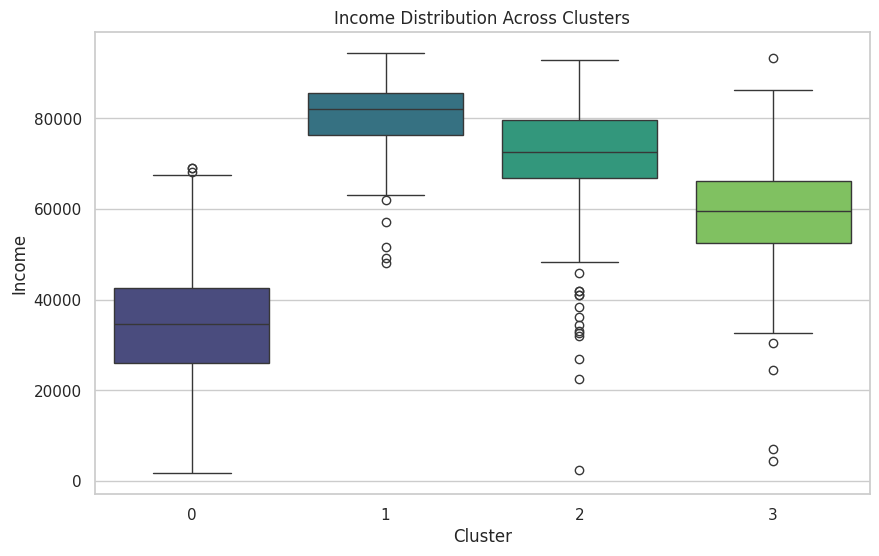

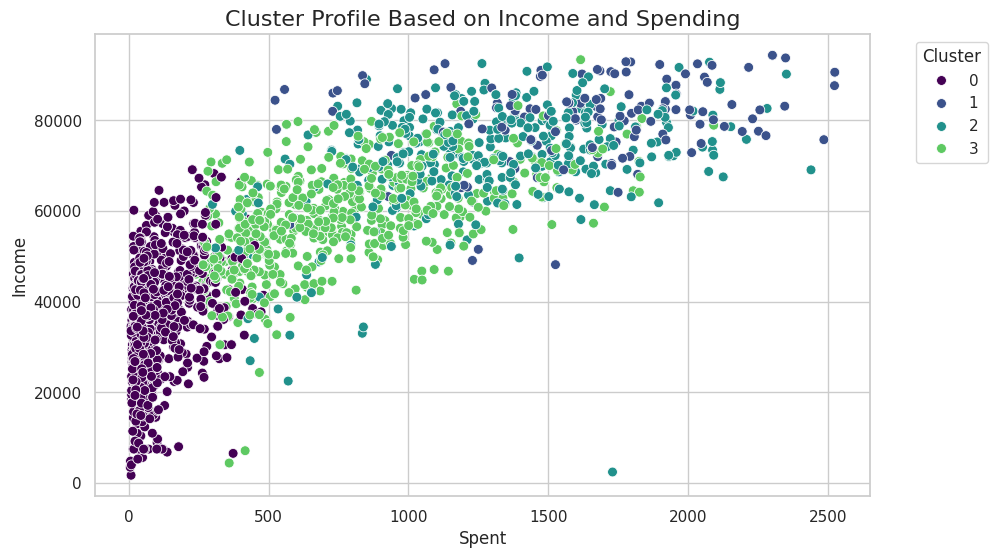

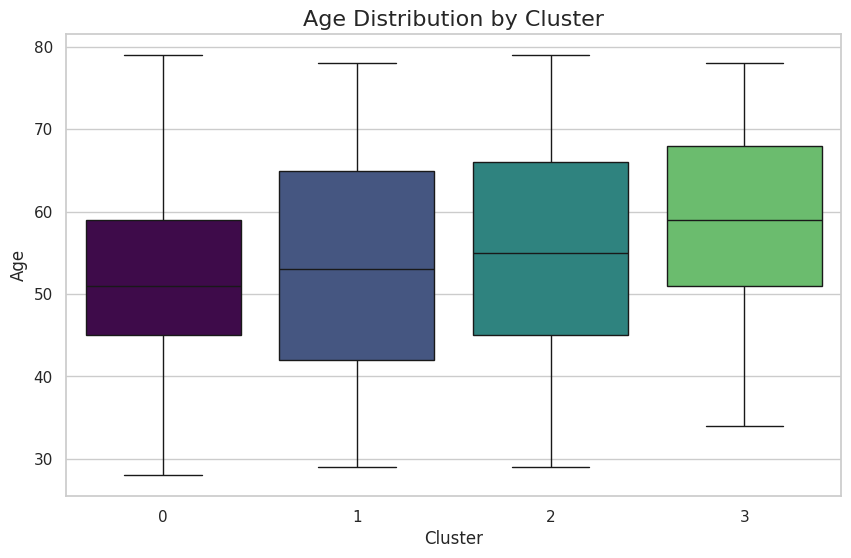

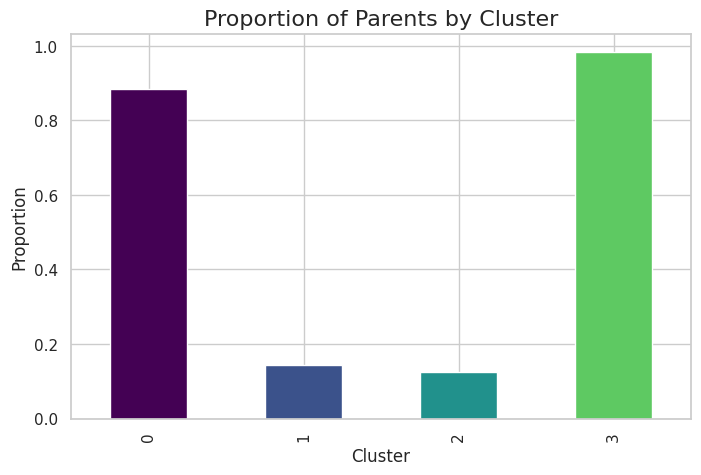

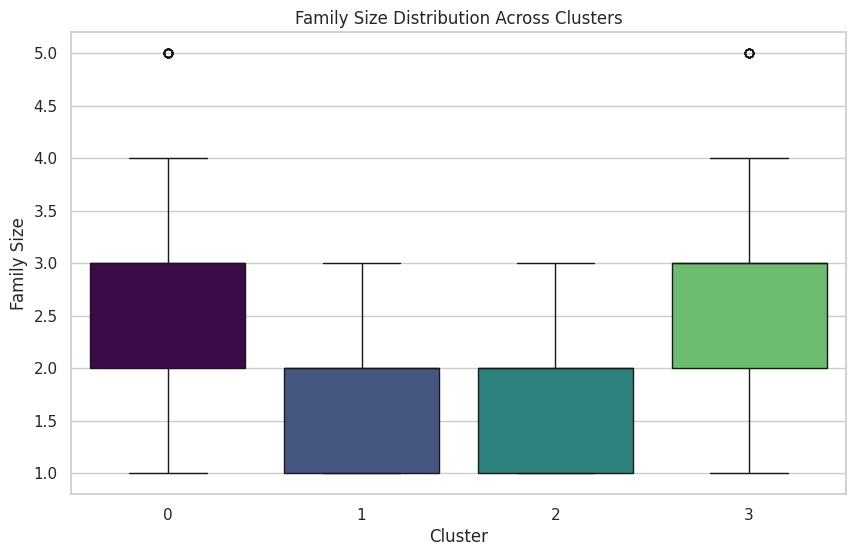

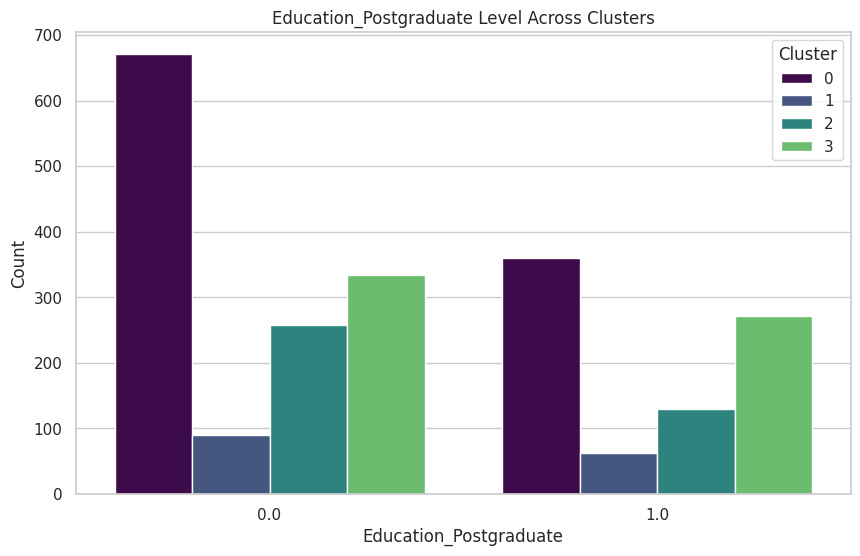

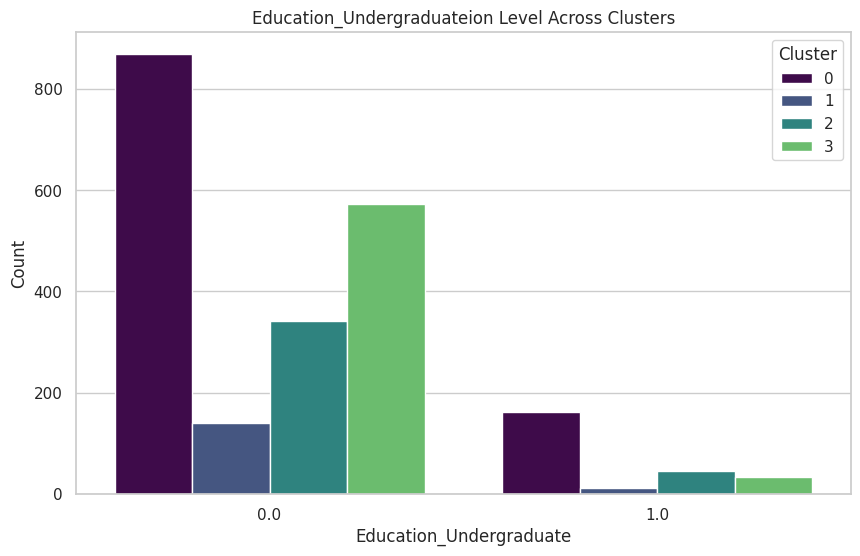

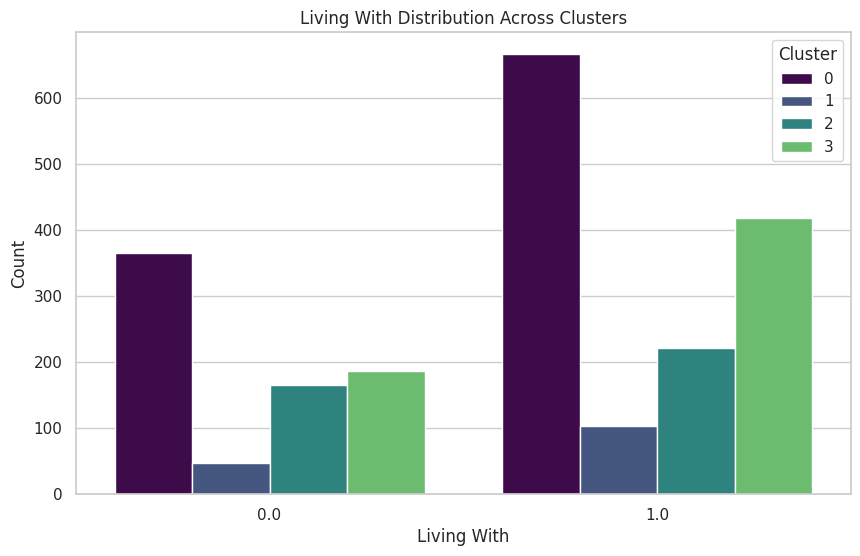

In [32]:
from matplotlib.cm import viridis
import matplotlib.colors as mcolors

# Add the cluster labels to the original processed DataFrame (`df`)
df['Cluster'] = kmeans.labels_

# Define Viridis colors for clusters
num_clusters = df['Cluster'].nunique()  # Detect the number of clusters
viridis_palette = [mcolors.to_hex(viridis(i / num_clusters)) for i in range(num_clusters)]

# Plotting the distribution of 'Income' across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Income', data=df, palette="viridis")
plt.title("Income Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Income")
plt.show()


# Scatterplot of income vs. spent by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Spent', y='Income', hue='Cluster', palette=viridis_palette, s=50)
plt.title("Cluster Profile Based on Income and Spending", fontsize=16)
plt.xlabel("Spent", fontsize=12)
plt.ylabel("Income", fontsize=12)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.show()

# Age boxplot for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='Age', palette=viridis_palette)
plt.title("Age Distribution by Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

# Compare the proportion of parents in each cluster
parent_proportion = df.groupby('Cluster')['Is_Parent'].mean()
parent_proportion.plot(kind='bar', color=viridis_palette, figsize=(8, 5))
plt.title("Proportion of Parents by Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.show()

# Plotting the distribution of 'Family_Size' across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Family_Size', data=df, palette=viridis_palette)
plt.title("Family Size Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Family Size")
plt.show()


# Plotting 'Education_Postgraduate' across clusters (education might be categorical)
plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Postgraduate', hue='Cluster', data=df, palette=viridis_palette)
plt.title("Education_Postgraduate Level Across Clusters")
plt.xlabel("Education_Postgraduate")
plt.ylabel("Count")
plt.show()

# Plotting 'Education_Undergraduate' across clusters (education might be categorical)
plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Undergraduate', hue='Cluster', data=df, palette=viridis_palette)
plt.title("Education_Undergraduateion Level Across Clusters")
plt.xlabel("Education_Undergraduate")
plt.ylabel("Count")
plt.show()

# Plotting 'Living_With' across clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Living_With_Partner', hue='Cluster', data= df, palette=viridis_palette)
plt.title("Living With Distribution Across Clusters")
plt.xlabel("Living With")
plt.ylabel("Count")
plt.show()





### Promotion Acceptance: Analyzing Accepted Promotions Across Clusters


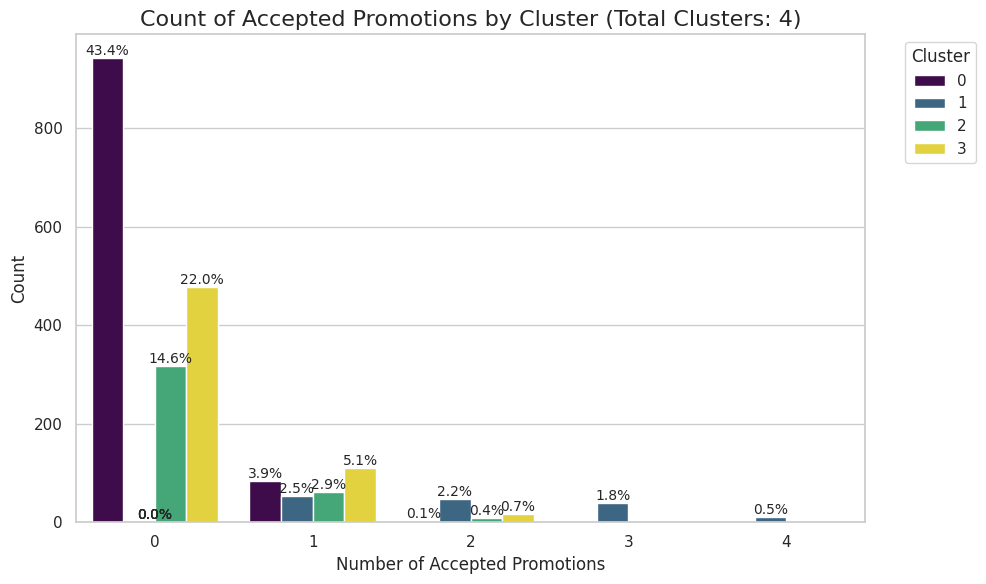

In [33]:
# Create a new column 'Total_Accepted_Promotions' adding the accepted promotions
df['Total_Accepted_Promotions'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

# Set a style for the plot
sns.set(style="whitegrid")

# View the count of accepted promotions per cluster with a stacked bar plot
plt.figure(figsize=(10, 6))

# Count plot for the total accepted promotions per cluster with hue for the cluster
sns.countplot(x='Total_Accepted_Promotions', hue='Cluster', data=df, palette='viridis')

# Set the title dynamically based on the number of clusters
plt.title(f"Count of Accepted Promotions by Cluster (Total Clusters: {df['Cluster'].nunique()})", fontsize=16)

# Labeling the axes
plt.xlabel("Number of Accepted Promotions", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adjusting the legend to make it more readable
plt.legend(title="Cluster", loc='upper right', bbox_to_anchor=(1.15, 1))

# Adding percentages to the bars
total_promos = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    percentage = (height / total_promos) * 100
    plt.text(x + width / 2, y + height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


# Insights from the Count of Accepted Promotions by Cluster

It is observed that the majority of individuals in Cluster 0 (approximately 43.4%) did not accept any promotions. This could indicate that this group has low engagement with promotional offers or has needs that are not met by these promotions.


Overall, most individuals in the different clusters accepted few promotions, as the majority of the bars are concentrated in the categories of 0 and 1 accepted promotion. This could indicate that the current promotions are not attractive or relevant enough for a large portion of the users.



### Distribution of Number of Deals Purchased Across Clusters

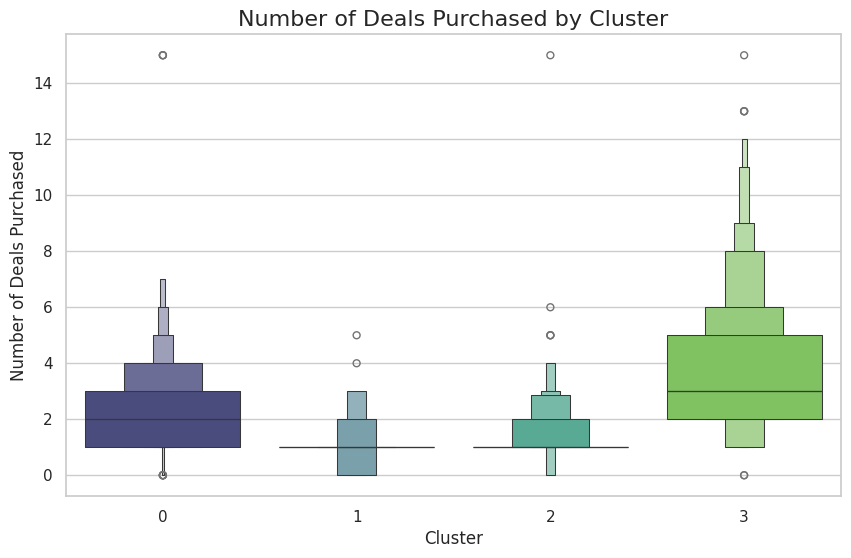

In [34]:
# Assuming you have a column 'NumDealsPurchases'
df['NumDealsPurchases'] = df['NumDealsPurchases']
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Cluster', y='NumDealsPurchases', data=df, palette='viridis')
plt.title("Number of Deals Purchased by Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Deals Purchased", fontsize=12)
plt.show()


**Cluster 0** shows a moderate spread, with most customers purchasing between 1 and 3 deals. However, a few significant outliers have purchased more than 14 deals, indicating a small but highly active segment.

**Cluster 1** has a low range of purchases, with most customers buying 0 or 1 deal. This suggests a relatively inactive group regarding deal purchases.

**Cluster 2** behaves similarly to Cluster 1, with very few deals purchased overall, although a couple of outliers reach up to 6 deals.

**Cluster 3** stands out with the highest deal activity. The majority purchased between 2 and 5 deals, and there are noticeable outliers reaching up to 15 deals. This cluster likely represents the most engaged customers.

## Conclusions

## Cluster number 0:

 It is mainly composed of people who are, without a doubt, parents. The family structure tends to be moderate size, with a maximum of four members, but with at least two members in each home. A relevant aspect of this group is that it includes many single parents, which constitute a subset within the general category. As for family dynamics, most members of this cluster have at least one teenager at home, suggesting that they are at a stage of family life that implies secondary or higher school age. In addition, this cluster is characterized by a more advanced age range compared to other groups, indicating that parents in this cluster are relatively higher, possibly in a phase of maturity or family stability

## Cluster number 1:

 Cluster number 1 is mainly composed of people who have no children, which clearly distinguishes it from other clusters. The family in this group tends to be smaller, with a maximum of only two members, indicating that households are mainly couples or individuals. In this cluster, there is a slight majority of couples about single people, which suggests that, although they have no children, many of these homes are made up of couples who are probably in a phase of life in which they do not seek to expand the family. The age range is diverse, covering from young adults to older people. This group is also characterized by a relatively high level of income, which may indicate greater economic stability and the ability to allocate resources to other aspects of life, beyond family expenses related to the raising of children.

## Cluster number 2:

 Cluster number 2 is mostly formed by parents, although their homes are smaller, with a maximum of three members. This cluster has a particularity: parents usually have one or two children, but not teenagers. It is common for these parents to have young children, which suggests that they are at an early stage of parenting. In terms of age, this group tends to be relatively younger, with people in an early or medium stages of adulthood, who are in full formation of their family and their professional life. The presence of young children implies that their priorities are probably focused on the care and education of the youngest, which can influence their consumption and lifestyle decisions.

 ##  Cluster number 3:

 Cluster number 3 is formed by individuals who are definitely parents, and their homes are usually larger, with a maximum of five members. In this group, most households include at least one teenager, suggesting that these parents are in a phase of life in which children have already overcome childhood and are in full adolescence, a stage that can present new Challenges and family dynamics. As for age, this cluster is made up of older people, which indicates that they have probably had children at a relatively early age and who are now dealing with the challenges of having teenage children. Unlike other groups, this cluster is characterized by a lower income level, which can influence the decisions that these parents make in terms of family expenses, education and general welfare.